In [1]:
import numpy as np          
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib_inline
import warnings
import pickle
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\startup_data.csv")

In [4]:
df.head(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [5]:
df.tail(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private
499,Startup_500,HealthTech,4,211.76,2563.17,84.19,2374,5.26,0,2000,North America,Private


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [7]:
df['Industry'].value_counts()

Industry
EdTech           74
FinTech          71
E-Commerce       70
Gaming           62
AI               62
IoT              61
Cybersecurity    51
HealthTech       49
Name: count, dtype: int64

In [8]:
df.isna().sum()

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [9]:
df.isnull().sum()

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [10]:
df.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


In [11]:
df.describe(include='O')

,Startup Name,Industry,Region,Exit Status
count,500,500,500,500
unique,500,8,5,3
top,Startup_1,EdTech,Australia,Private
freq,1,74,108,348


In [12]:
df['Exit Status'].value_counts()

Exit Status
Private     348
Acquired    107
IPO          45
Name: count, dtype: int64

In [13]:
df['Region'].value_counts()

Region
Australia        108
Asia             103
Europe           102
North America     97
South America     90
Name: count, dtype: int64

In [14]:
df.drop(['Startup Name', 'Region', 'Employees', 'Year Founded'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Industry                500 non-null    object 
 1   Funding Rounds          500 non-null    int64  
 2   Funding Amount (M USD)  500 non-null    float64
 3   Valuation (M USD)       500 non-null    float64
 4   Revenue (M USD)         500 non-null    float64
 5   Market Share (%)        500 non-null    float64
 6   Profitable              500 non-null    int64  
 7   Exit Status             500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [16]:
ordinal=OrdinalEncoder(categories=[['EdTech','FinTech','E-Commerce','Gaming','AI','IoT','Cybersecurity','HealthTech'],['Private','Acquired','IPO']])

In [17]:
encoded_values = ordinal.fit_transform(df[['Industry', 'Exit Status']])

In [18]:
encoded_df = pd.DataFrame(encoded_values, columns=['Industry_encoded', 'Status_encoded'])

In [19]:
df = pd.concat([df, encoded_df], axis=1)

In [20]:
df.head(5)

,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Market Share (%),Profitable,Exit Status,Industry_encoded,Status_encoded
0,IoT,1,101.09,844.75,67.87,5.20,0,Private,5.0,0.0
1,EdTech,1,247.62,3310.83,75.65,8.10,1,Private,0.0,0.0
2,EdTech,1,109.24,1059.37,84.21,2.61,1,Private,0.0,0.0
3,Gaming,5,10.75,101.90,47.08,2.53,0,Private,3.0,0.0
4,IoT,4,249.28,850.11,50.25,4.09,0,Acquired,5.0,1.0


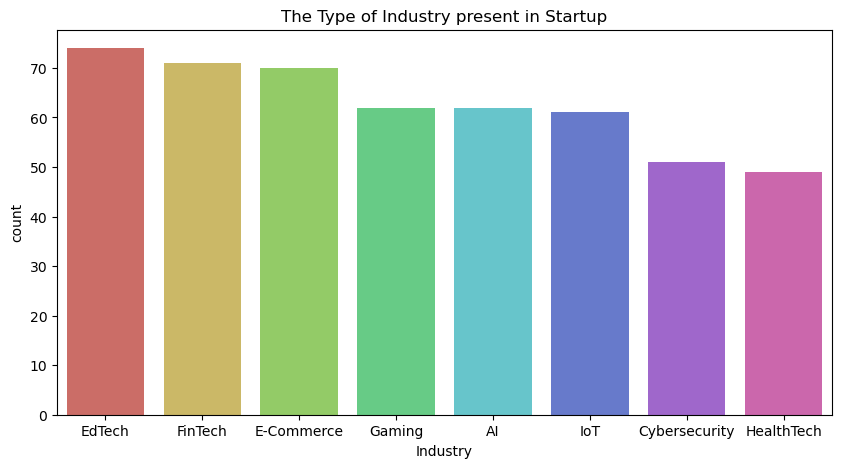

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='Industry',y='count',data=df['Industry'].value_counts().reset_index(),palette='hls')
plt.title("The Type of Industry present in Startup")
plt.show()

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [23]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Funding Rounds', 'Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)', 'Market Share (%)', 'Profitable', 'Industry_encoded', 'Status_encoded']

We have 2 categorical features : ['Industry', 'Exit Status']


<Axes: ylabel='count'>

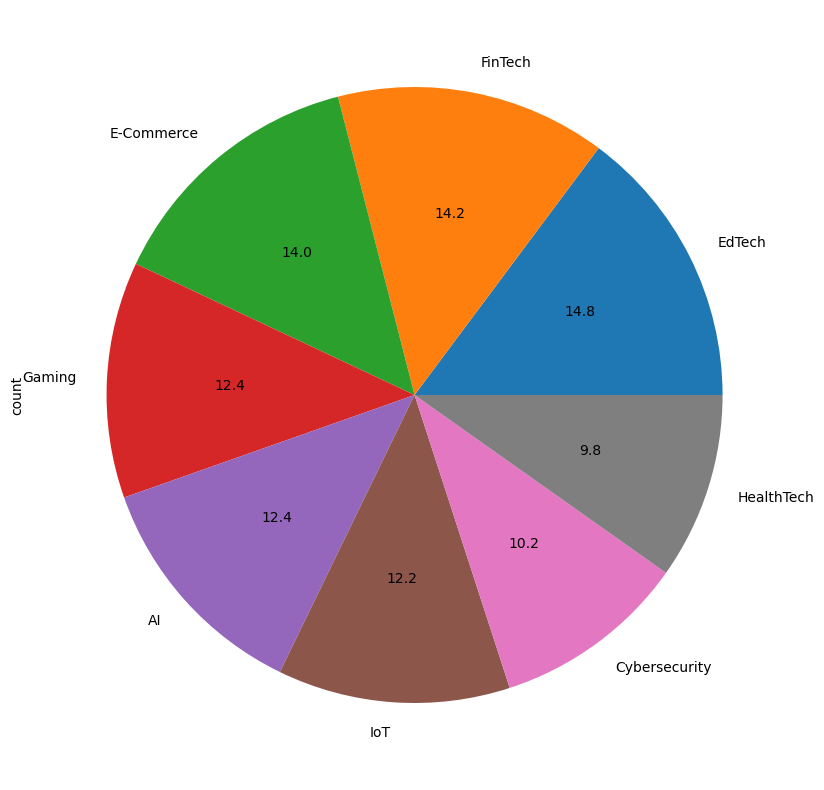

In [24]:
df['Industry'].value_counts().plot.pie(y=df['Industry'],figsize=(10,10),autopct='%1.1f')

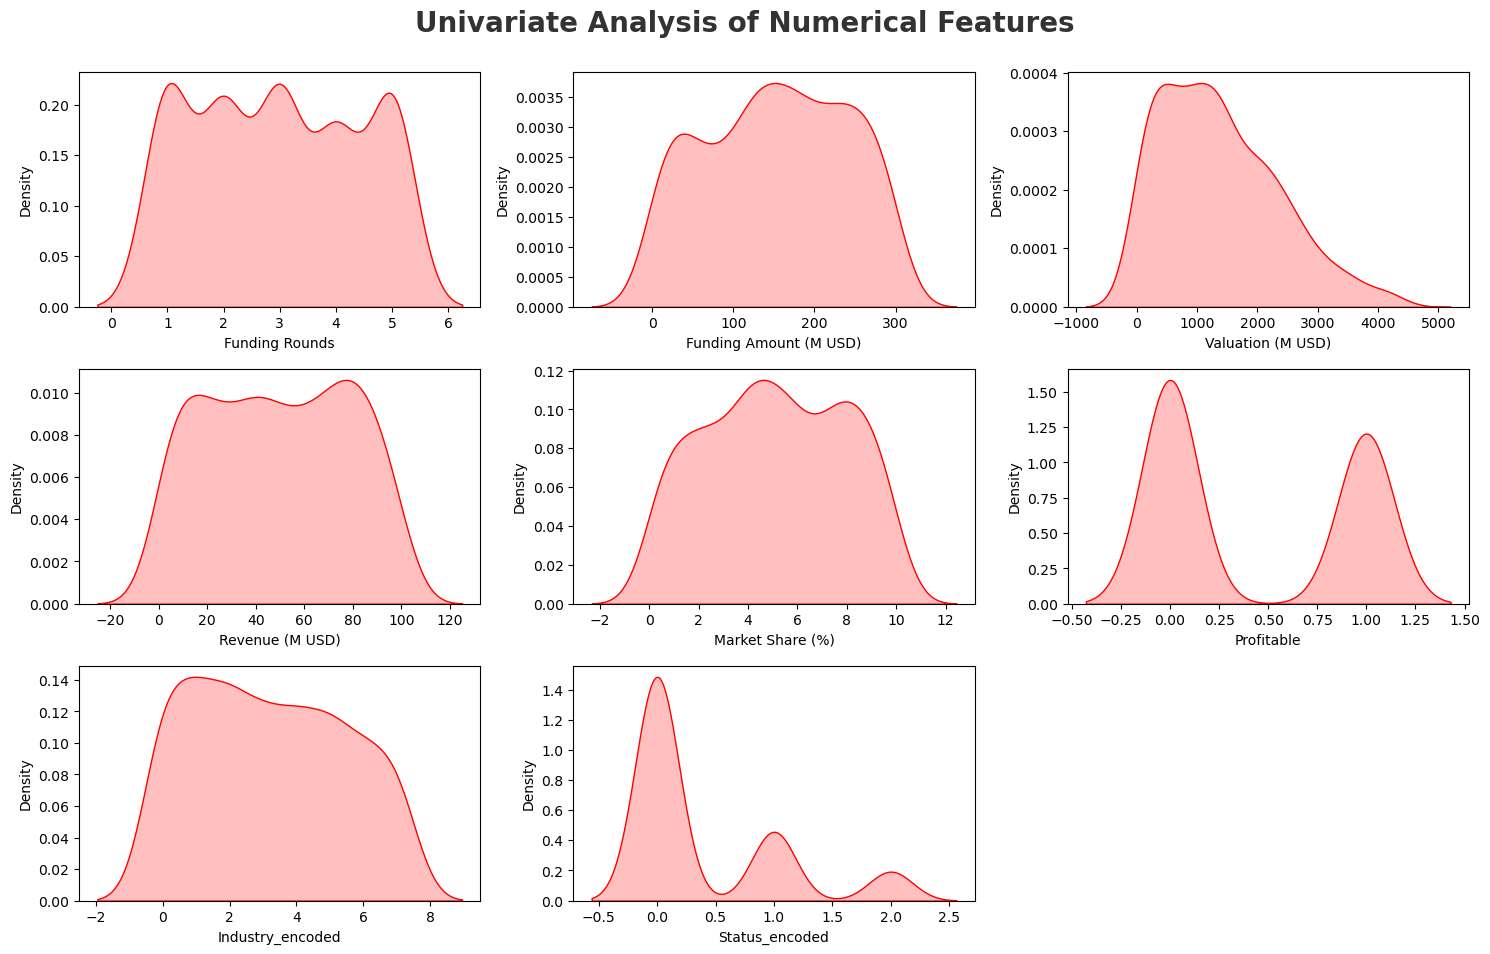

In [25]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8,y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

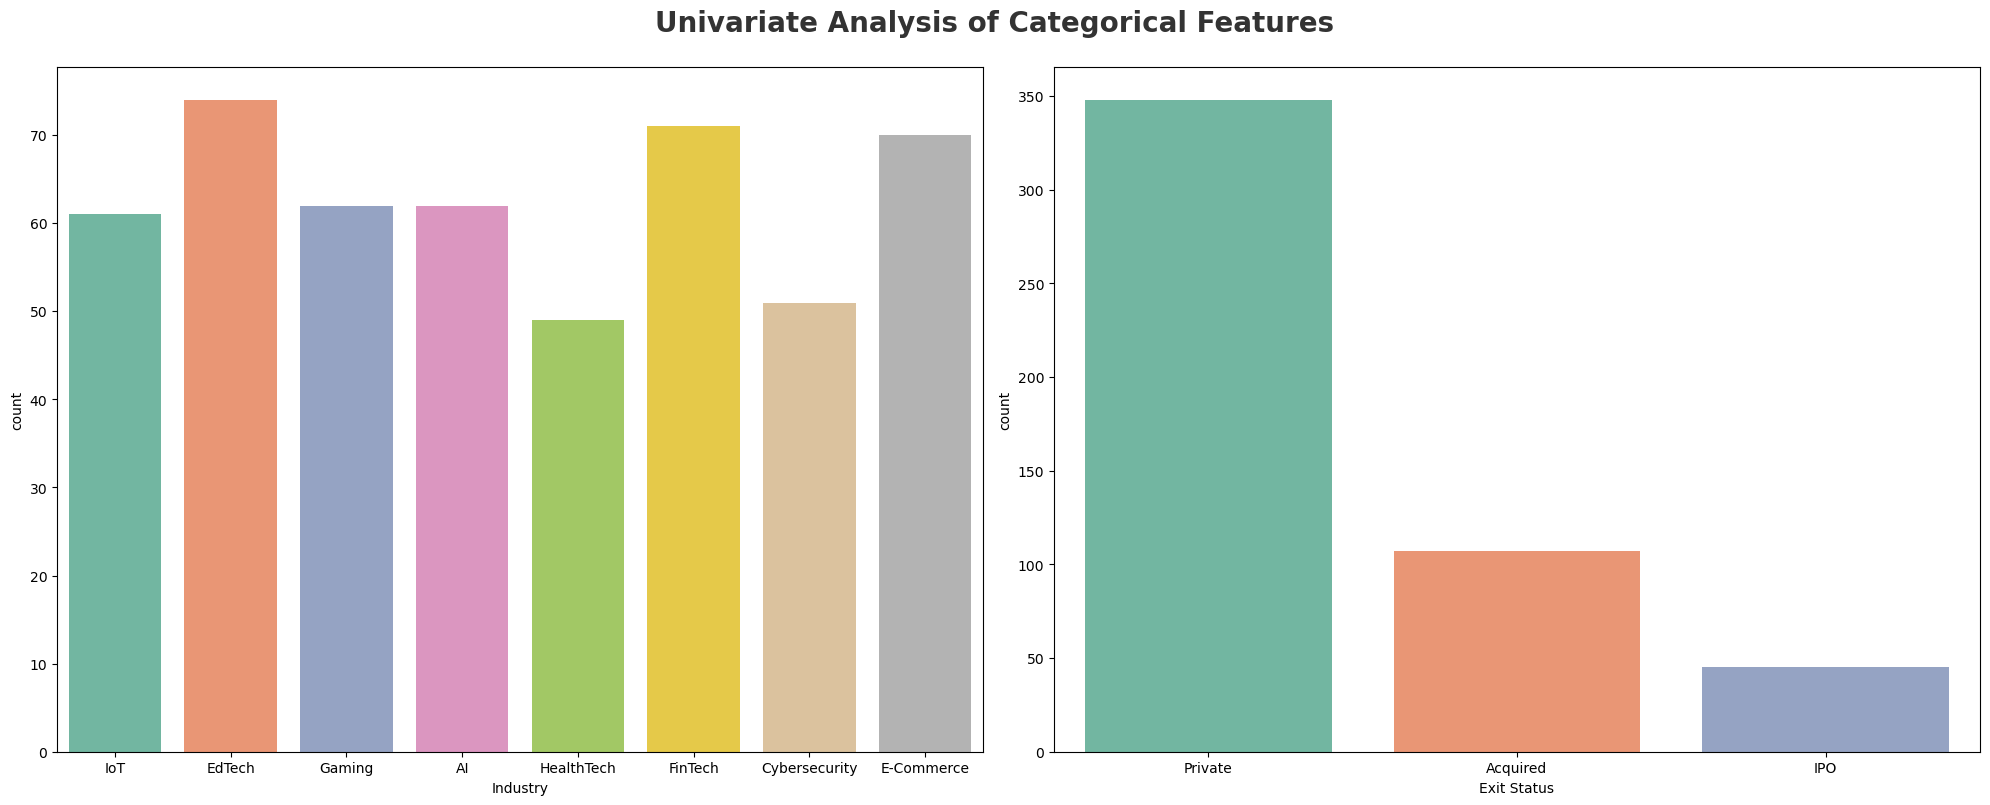

In [26]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Industry', 'Exit Status']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=0)
    plt.tight_layout() 

<Axes: ylabel='count'>

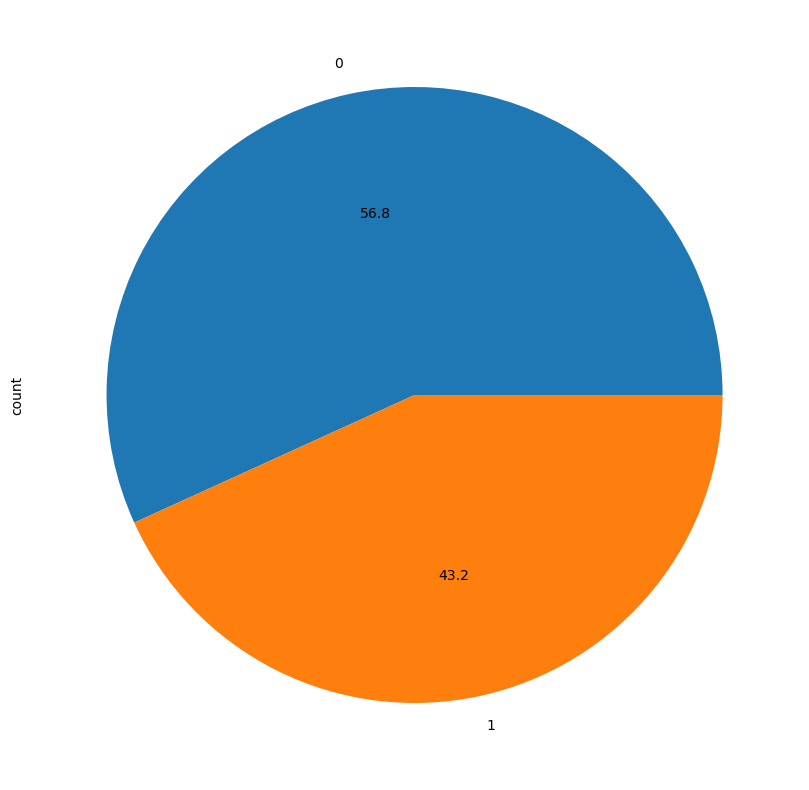

In [27]:
df['Profitable'].value_counts().plot.pie(y=df['Profitable'],figsize=(10,10),autopct='%1.1f')

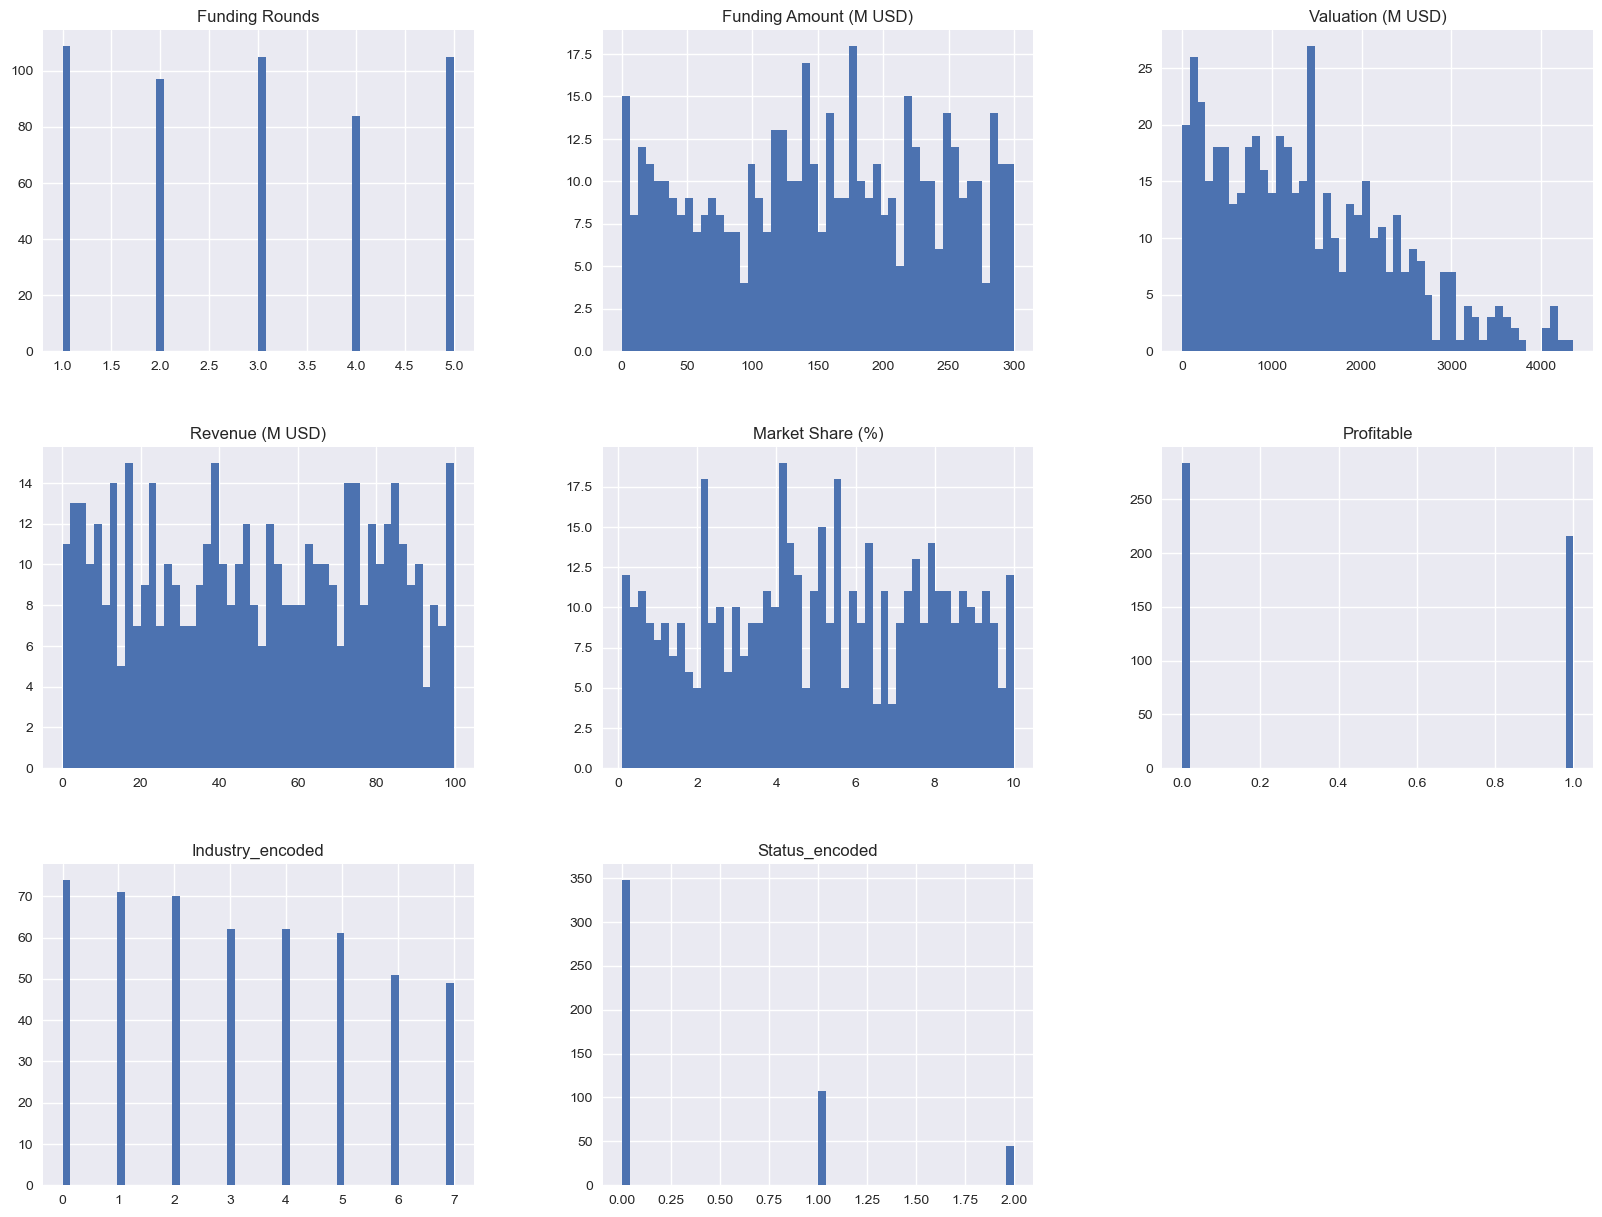

In [28]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

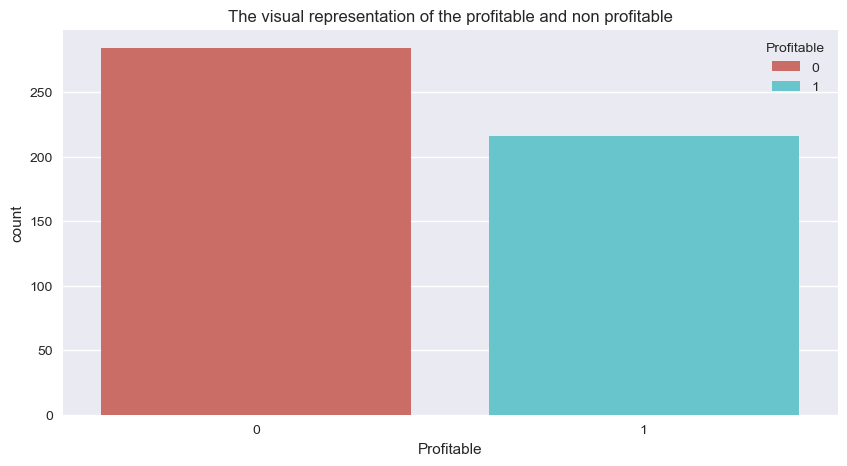

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Profitable'],y='count',data=df['Profitable'].value_counts().reset_index(),palette='hls',hue=df['Profitable'])
plt.title("The visual representation of the profitable and non profitable")
plt.show()

In [30]:
df['Profitable'].value_counts()

Profitable
0    284
1    216
Name: count, dtype: int64

In [31]:
x=df.drop(['Industry','Profitable','Exit Status'],axis=1)
y=df['Profitable']

In [32]:
x.shape

(500, 7)

In [33]:
y.shape

(500,)

In [34]:
x.corr()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Market Share (%),Industry_encoded,Status_encoded
Funding Rounds,1.000000,-0.050223,-0.067821,0.014539,-0.014285,0.010557,0.011323
Funding Amount (M USD),-0.050223,1.000000,0.795061,0.033103,0.062200,-0.087225,0.034151
Valuation (M USD),-0.067821,0.795061,1.000000,0.058219,0.103547,-0.060973,0.032268
Revenue (M USD),0.014539,0.033103,0.058219,1.000000,-0.012512,0.034099,-0.002421
Market Share (%),-0.014285,0.062200,0.103547,-0.012512,1.000000,0.038737,0.019108
Industry_encoded,0.010557,-0.087225,-0.060973,0.034099,0.038737,1.000000,0.001360
Status_encoded,0.011323,0.034151,0.032268,-0.002421,0.019108,0.001360,1.000000


<Axes: >

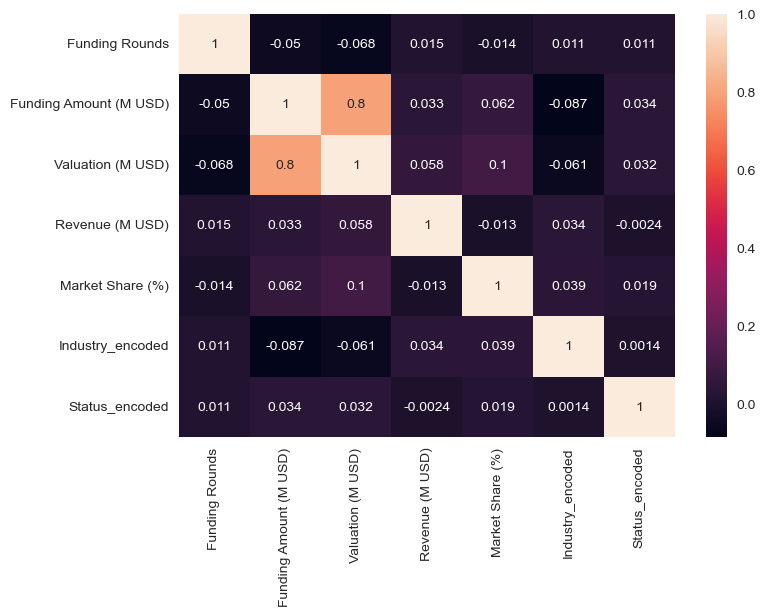

In [35]:
sns.heatmap(x.corr(),annot=True)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
x_train.shape

(375, 7)

In [38]:
y_train.shape

(375,)

In [39]:
x_test.shape

(125, 7)

In [40]:
y_test.shape

(125,)

In [41]:
scaler=StandardScaler()

In [42]:
x_train=scaler.fit_transform(x_train)

In [43]:
x_test=scaler.transform(x_test)

In [44]:
logistic=LogisticRegression(class_weight='balanced',max_iter=1000)

In [45]:
logistic.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
y_pred=logistic.predict(x_test)

In [47]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [48]:
print("----------performance Metrics--------------")
print("The accuracy score is :",score)
print("The confusion matrix is :",cm)
print("The classification report is :\n",report)

----------performance Metrics--------------
The accuracy score is : 0.592
The confusion matrix is : [[43 29]
 [22 31]]
The classification report is :
               precision    recall  f1-score   support

           0       0.66      0.60      0.63        72
           1       0.52      0.58      0.55        53

    accuracy                           0.59       125
   macro avg       0.59      0.59      0.59       125
weighted avg       0.60      0.59      0.59       125



In [49]:
model=LogisticRegression(class_weight='balanced',max_iter=1000)
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
parms=dict(penalty=penalty,C=c_values,solver=solver)

In [50]:
cv=StratifiedKFold()

In [51]:
grid=GridSearchCV(estimator=model,param_grid=parms,scoring='f1',cv=cv,n_jobs=-1)

In [52]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [53]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [54]:
y_pred=grid.predict(x_test)

In [55]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [56]:
print("----------performance Metrics--------------")
print("The accuracy score is :",score)
print("The confusion matrix is :",cm)
print("The classification report is :\n",report)

----------performance Metrics--------------
The accuracy score is : 0.6
The confusion matrix is : [[43 29]
 [21 32]]
The classification report is :
               precision    recall  f1-score   support

           0       0.67      0.60      0.63        72
           1       0.52      0.60      0.56        53

    accuracy                           0.60       125
   macro avg       0.60      0.60      0.60       125
weighted avg       0.61      0.60      0.60       125

